_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.

## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.

### Análisis descriptivo de los datos

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pip install ucimlrepo

In [3]:
# se carga el dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

# metadata
print(covertype.metadata)

# variable information
# print(covertype.variables)

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [4]:
covertype.variables

,name,role,type,demographic,description,units,missing_values
0,Elevation,Feature,Integer,None,None,None,no
1,Aspect,Feature,Integer,None,None,None,no
2,Slope,Feature,Integer,None,None,None,no
3,Horizontal_Distance_To_Hydrology,Feature,Integer,None,None,None,no
4,Vertical_Distance_To_Hydrology,Feature,Integer,None,None,None,no
5,Horizontal_Distance_To_Roadways,Feature,Integer,None,None,None,no
6,Hillshade_9am,Feature,Integer,None,None,None,no
7,Hillshade_Noon,Feature,Integer,None,None,None,no
8,Hillshade_3pm,Feature,Integer,None,None,None,no
9,Horizontal_Distance_To_Fire_Points,Feature,Integer,None,None,None,no


Se han eliminado las filas nulas.

In [5]:
X = X.dropna(how='all')

Debido a que las variables categóricas son numéricas y no una String, no hay que pasar las variables de nominal a binario. Esto también ayuda a que al pasar dichos datos a los modelos no hay que realizar One-Hot-Enconding por ejemplo, ya que esta ya en valores binarios, y la variable objetivo no hay que modificarla.

Se ha utilizado el método head() para visualizar las primeras filas del conjunto de datos y así verificar que los valores han sido correctamente leídos.

In [6]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


¿Cuántas instancias de datos tiene el dataset?

In [7]:
## PON AQUÍ TU CÓDIGO
X.shape[0]

581012

El dataset tiene 581012 instancias de datos.

¿Cuántas variables continuas hay en el dataset?

In [8]:
X.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,0.051434,0.436074,0.063627
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,0.220882,0.495897,0.244087
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Las variables categóricas en este caso tienen una desviación estándar (std) baja, porque suelen tomar valores binarios (0 o 1) o pocos valores distintos. Además, no se analiza valores raros como valores negativos en variables que no están, sin embargo, si hay máximos muy alejados del 75% como es el caso de Vertical_Distance_To_Hydrology.


Si se observa la naturaleza y contexto de cada variable, se debería de realizar una transformación de variables:

In [9]:
categorical_vars = X.columns[X.std() < 1].tolist()

# Convertir las categóricas a tipo "category"
X[categorical_vars] = X[categorical_vars].astype("category")
y = y.astype("category")
# Mostrar el resumen estadístico para las categóricas
categorical_describe = X[categorical_vars].describe()

Comprobamos que la conversión se ha realizado de forma correcta.

In [10]:
## PON AQUÍ TU CÓDIGO
X.dtypes

,0
Elevation,int64
Aspect,int64
Slope,int64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64
Hillshade_3pm,int64
Horizontal_Distance_To_Fire_Points,int64


In [11]:
continuous_cols = X.select_dtypes(include=['int64', 'float64']).columns
continuous_cols = [col for col in continuous_cols if X[col].std() > 1]
print(f"Número de variables continuas: {len(continuous_cols)}")

Número de variables continuas: 10


El número de variables continuas es 10.

¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

In [12]:
categorical_cols = X.columns.difference(continuous_cols)
print(f"Número de variables categóricas: {len(categorical_cols)}")

Número de variables categóricas: 44


El número de variables categóricas es 44.

¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

Antes de realizar el balanceo, se va a realizar un estudio de las variables y analizar inconsistencias. Primero se observará si las variables categóricas solo contienen valores 0,1. Por lo tanto, se ve que no hay ningún valor mal anotado en dichas variables.

In [13]:
for col in categorical_cols:
    unique_values = X[col].unique()
    print(f"Valores únicos en {col}: {unique_values}")

Valores únicos en Soil_Type1: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type10: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type11: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type12: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type13: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type14: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type15: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type16: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type17: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type18: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type19: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type2: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type20: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type21: [0, 1]
Categories (2, int64): [0, 1]
Valores únicos en Soil_Type22: [0, 1]
Categories (

A continuación, la distribución de las variables continuas.

In [14]:
X.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


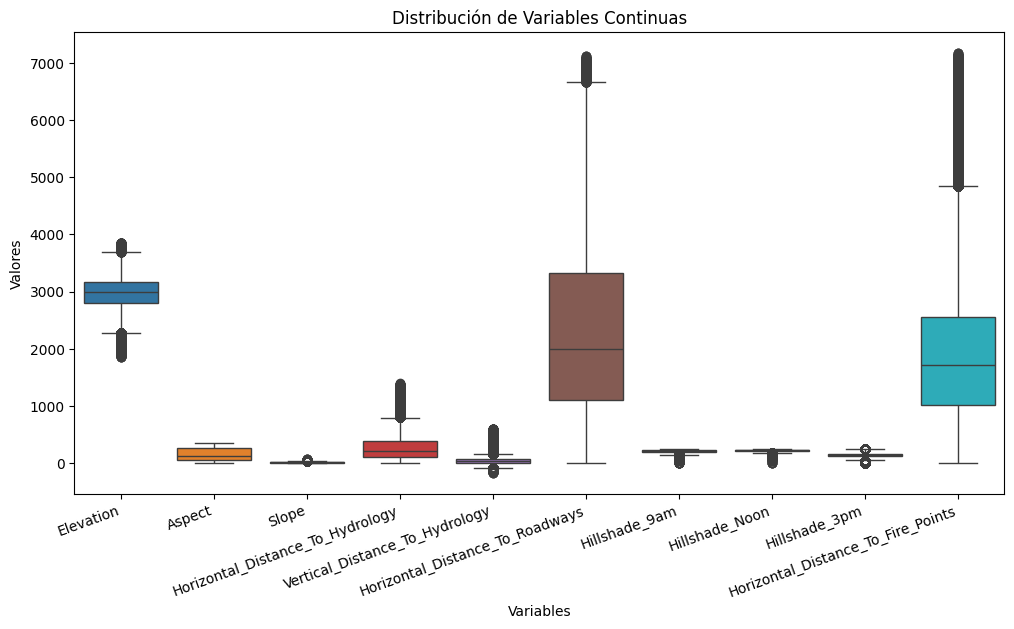

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X[continuous_cols])
plt.title('Distribución de Variables Continuas')
plt.xlabel('Variables')
plt.ylabel('Valores')

plt.xticks(rotation=20, ha='right')

plt.show()

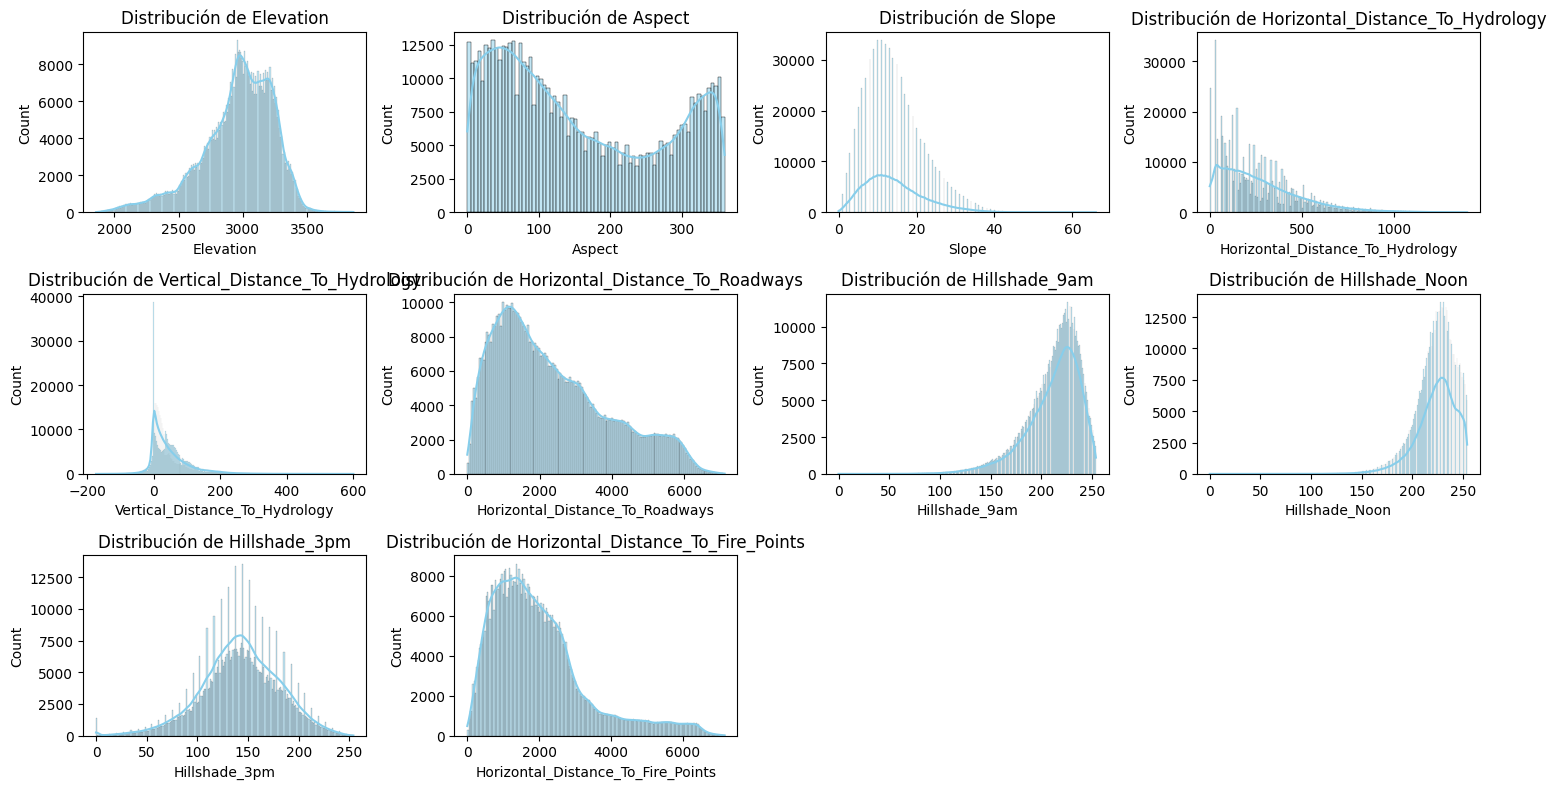

In [16]:
plt.figure(figsize=(15,8))
for i, variable in enumerate(continuous_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(X[variable], kde=True, color='skyblue')
    plt.title(f'Distribución de {variable}')
    plt.tight_layout()

plt.show()

Observando las gráficas anteriores, encontramos diversos outliers que pueden influir en la distribución de los datos y afectar el rendimiento de los modelos, por lo tanto se va a reducir dichos valores.

In [17]:
continuous_data = X[continuous_cols]
X_cleaned = X.copy()

for col in continuous_data:
    if (X[col] > 0).all():
        X_cleaned[col] = np.log1p(X[col])

Q1 = continuous_data.quantile(0.25)
Q3 = continuous_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

non_outliers_mask = ~((continuous_data < lower_bound) | (continuous_data > upper_bound)).any(axis=1)

X_cleaned = X[non_outliers_mask]
y_cleaned = y[non_outliers_mask]

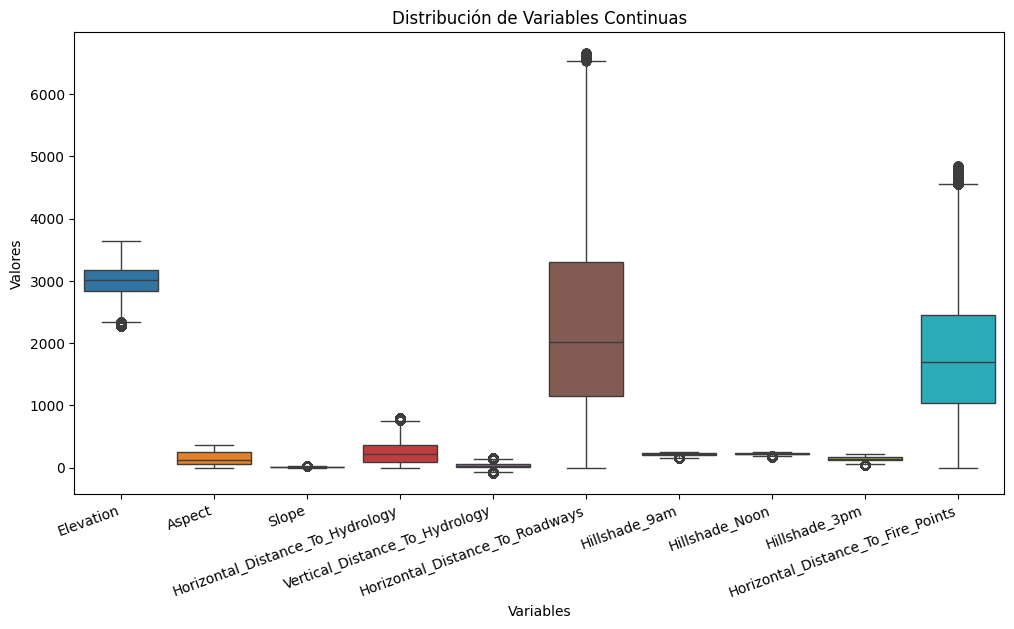

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_cleaned[continuous_cols])
plt.title('Distribución de Variables Continuas')
plt.xlabel('Variables')
plt.ylabel('Valores')

plt.xticks(rotation=20, ha='right')

plt.show()

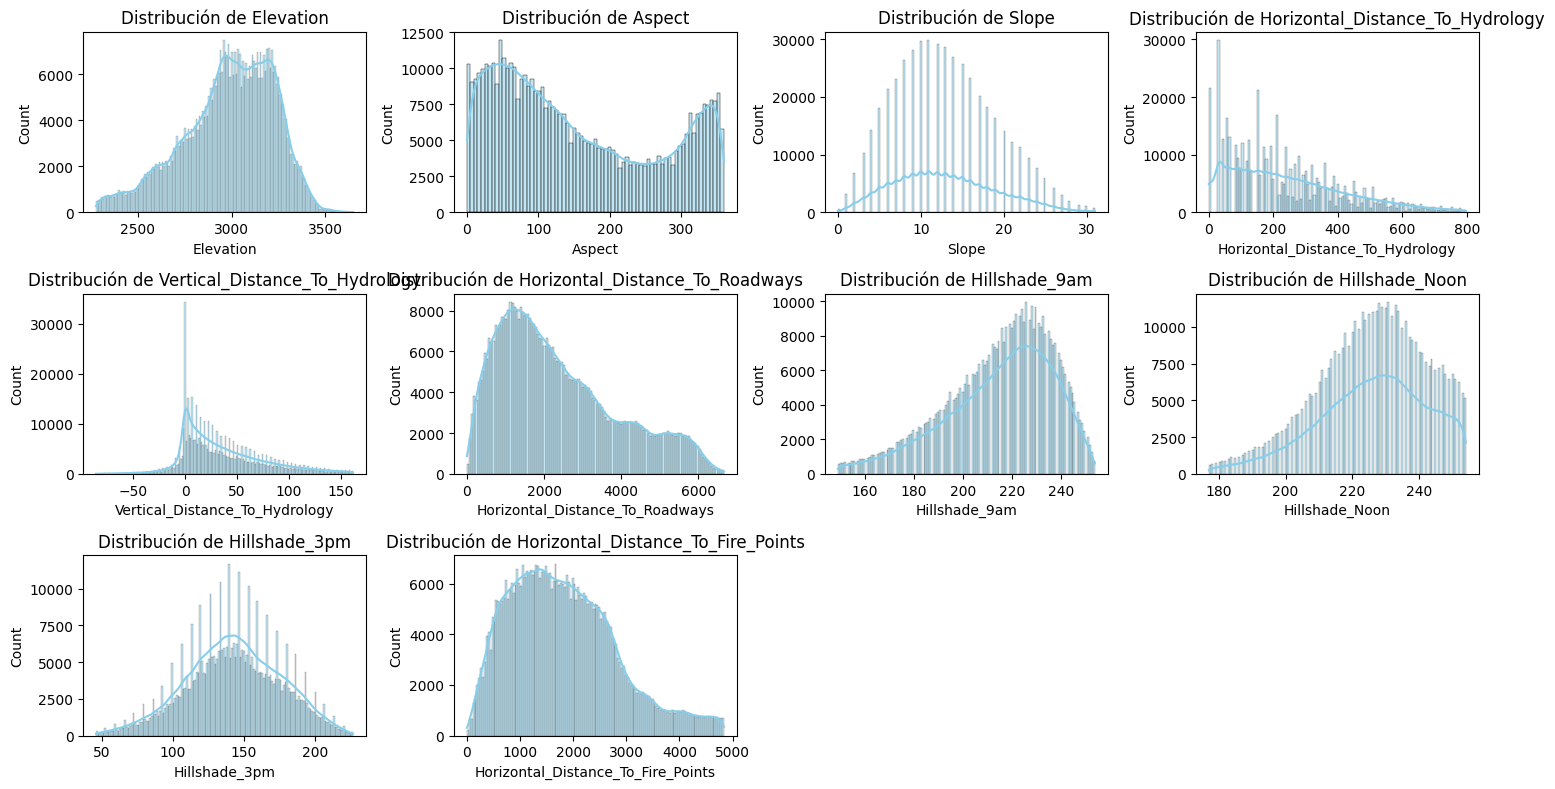

In [19]:
plt.figure(figsize=(15,8))
for i, variable in enumerate(continuous_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(X_cleaned[variable], kde=True, color='skyblue')
    plt.title(f'Distribución de {variable}')
    plt.tight_layout()

plt.show()

A pesar de que siguen existiendo los outliers, la cantidad se ha reducido considerablemente.

In [20]:
## PON AQUÍ TU CÓDIGO
class_distribution = y.value_counts()

print("Distribución de clases:")
print(class_distribution)

print("\n¿El dataset está balanceado?")
max_count = class_distribution.max()
min_count = class_distribution.min()
print(f"Máxima frecuencia: {max_count}")
print(f"Mínima frecuencia: {min_count}")
print(f"Diferencia relativa: {(max_count - min_count) / max_count:.2%}")

Distribución de clases:
Cover_Type
2             283301
1             211840
3              35754
7              20510
6              17367
5               9493
4               2747
Name: count, dtype: int64

¿El dataset está balanceado?
Máxima frecuencia: 283301
Mínima frecuencia: 2747
Diferencia relativa: 99.03%


Índice de desbalance: 103.13

Porcentaje de desbalance entre mayoritaria y minoritaria: 48.29%


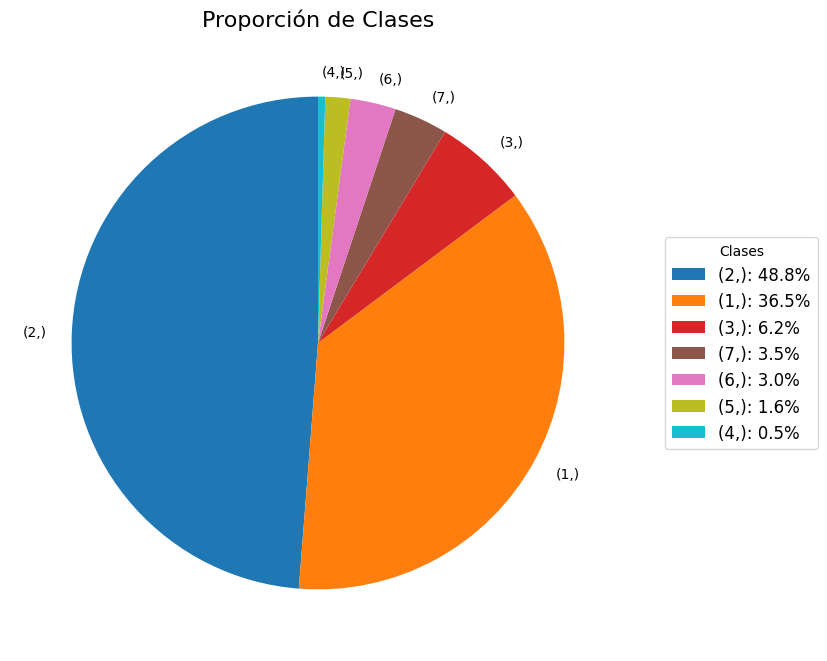

In [21]:
class_distribution = y.value_counts()
percentages = class_distribution / class_distribution.sum() * 100

max_percentage = percentages.max()
min_percentage = percentages.min()

imbalance_index = max_percentage / min_percentage

print(f"Índice de desbalance: {imbalance_index:.2f}")

imbalance_percentage = max_percentage - min_percentage
print(f"\nPorcentaje de desbalance entre mayoritaria y minoritaria: {imbalance_percentage:.2f}%")

plt.figure(figsize=(8, 8))
class_distribution.plot(kind='pie', autopct=None, startangle=90, cmap='tab10')
plt.title('Proporción de Clases', fontsize=16)
plt.ylabel('')

legend_labels = [f"{cls}: {p:.1f}%" for cls, count, p in zip(class_distribution.index, class_distribution, percentages)]
plt.legend(legend_labels, title="Clases", loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)
plt.show()

Si se analiza el gráfico anterior, se encuentra como la clase con mayores valores la identificada con el color azul oscuro (type 2: lodgepole), con un 48,8% de presencia en el dataset, mientras que la más baja de color azul clara (type 4: cottonwood/willow), con un 0.5%. Generando una descompensación entre ambas clases de un 48.29%. Este desbalance no solo pasa unidamente con estas dos tipos de cobertura forestal, sino que se mantiene entre las distintas, por lo tanto, la distribución de las clases objetivo no es uniforme, existiendo una gran diferencia en el número de instancias entre las clases.

Cuando se presenta un dataset desbalanceado las métricas globales, como la tasa de éxito del clasificador no pueden ser representativas del rendimiento real del modelo. Ya que los modelos tienden a sesgarse hacia la clase mayoritaria, lo que puede llevar a un rendimiento deficiente en la clasificación de la clase minoritaria, sin embargo, esto no se vería reflejado en la ratio de éxito global.

¿Existen valores nulos o perdidos en el dataset?

In [22]:
## PON AQUÍ TU CÓDIGO
null_values = X.isnull().sum().sum()
null_values

0

El dataset no tiene valores nulos y en el documento tampoco especifica ningún valor perdido en ninguna variable.

¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamos filtar aquellas correlaciones superiores al 0.80 con la variable de clase.

Teniendo en cuenta que la variable objetivo es categórica, nos interesa saber la correlación con ella. A diferencia de la práctica anterior que estábamos antes un modelo regresivo, ahora tenemos un modelo de clasificación, por lo tanto la matriz de correlación ya usada no tiene sentido en este contexto, para ello vamos a usar dos métodos, el chi-cuadrado y el ANOVA.

### Chi-cuadrado

In [23]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

categorical_cols = X.select_dtypes(include=['category']).columns

X_categorical = X[categorical_cols].apply(LabelEncoder().fit_transform)


In [24]:
chi2_scores, p_values = chi2(X_categorical, y)

chi2_df = pd.DataFrame({
    'Variable': categorical_cols,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
})

chi2_df = chi2_df.sort_values(by='Chi2 Score', ascending=False)

In [25]:
chi2_df

,Variable,Chi2 Score,p-value
43,Wilderness_Area4,294909.236042,0.000000e+00
10,Soil_Type10,121906.779172,0.000000e+00
4,Soil_Type4,66379.063031,0.000000e+00
38,Soil_Type38,65694.581044,0.000000e+00
39,Soil_Type39,62122.857979,0.000000e+00
3,Soil_Type3,61098.605858,0.000000e+00
2,Soil_Type2,54953.026901,0.000000e+00
6,Soil_Type6,45657.830813,0.000000e+00
40,Soil_Type40,40348.067606,0.000000e+00
0,Wilderness_Area1,30998.839431,0.000000e+00


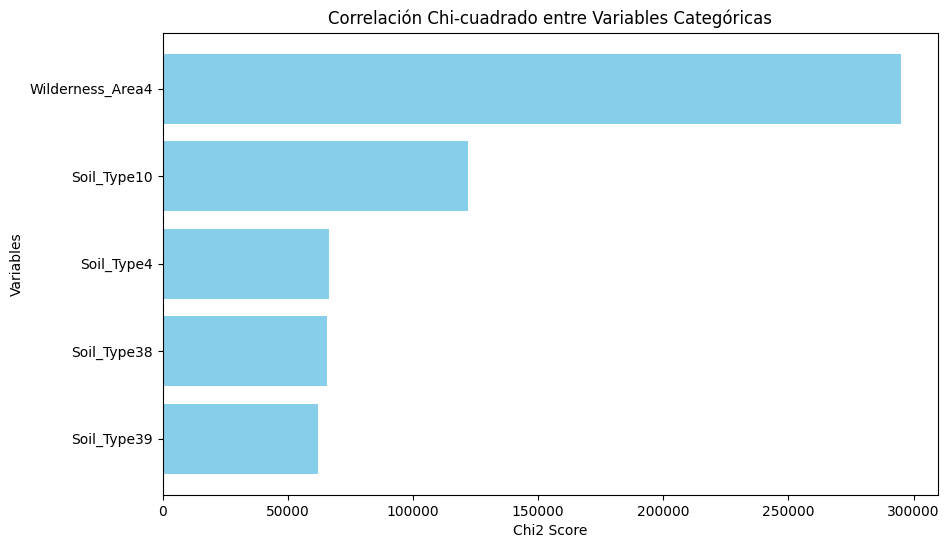

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(chi2_df['Variable'].head(), chi2_df['Chi2 Score'].head(), color='skyblue')
plt.xlabel('Chi2 Score')
plt.ylabel('Variables')
plt.title('Correlación Chi-cuadrado entre Variables Categóricas')
plt.gca().invert_yaxis()
plt.show()


Para el caso de la relación entre las variables categóricas y la variable objetivo, las de mayor valor son Wilderness_Area4, Soil_Type10 y Soil_Type4.

### ANOVA

In [27]:
from scipy.stats import f_oneway

y_categorical = y.squeeze().astype('category')

categorical_cols = X.select_dtypes(include=['category']).columns

continuous_cols = X.select_dtypes(include=['int64']).columns

anova_results = {}

for col in continuous_cols:
    groups = [X[col][y_categorical == cls] for cls in y_categorical.unique()]

    f_stat, p_value = f_oneway(*groups)

    anova_results[col] = {'F-statistic': f_stat, 'p-value': p_value}

anova_df = pd.DataFrame(anova_results).T
anova_df = anova_df.sort_values(by='F-statistic', ascending=False)

In [28]:
anova_df

,F-statistic,p-value
Elevation,155306.869021,0.0
Horizontal_Distance_To_Roadways,10275.781727,0.0
Slope,7762.474223,0.0
Horizontal_Distance_To_Fire_Points,7262.064444,0.0
Hillshade_9am,3231.992007,0.0
Hillshade_Noon,2920.383824,0.0
Horizontal_Distance_To_Hydrology,2364.952074,0.0
Vertical_Distance_To_Hydrology,1205.333661,0.0
Hillshade_3pm,1042.196255,0.0
Aspect,446.717061,0.0


Mientras que la relación de las variables continuas sobre la varibla objetivo, nos encontramos con Elevation, Horizontal_Distance_To_Roadways y Slope.

¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.values.ravel()
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df.head(10)

,Feature,Importance
0,Elevation,0.240450
5,Horizontal_Distance_To_Roadways,0.115698
9,Horizontal_Distance_To_Fire_Points,0.109241
3,Horizontal_Distance_To_Hydrology,0.060668
4,Vertical_Distance_To_Hydrology,0.057554
1,Aspect,0.047710
7,Hillshade_Noon,0.043717
6,Hillshade_9am,0.041604
8,Hillshade_3pm,0.041246
53,Wilderness_Area4,0.033647


<ipython-input-30-bb7a5a51fcd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


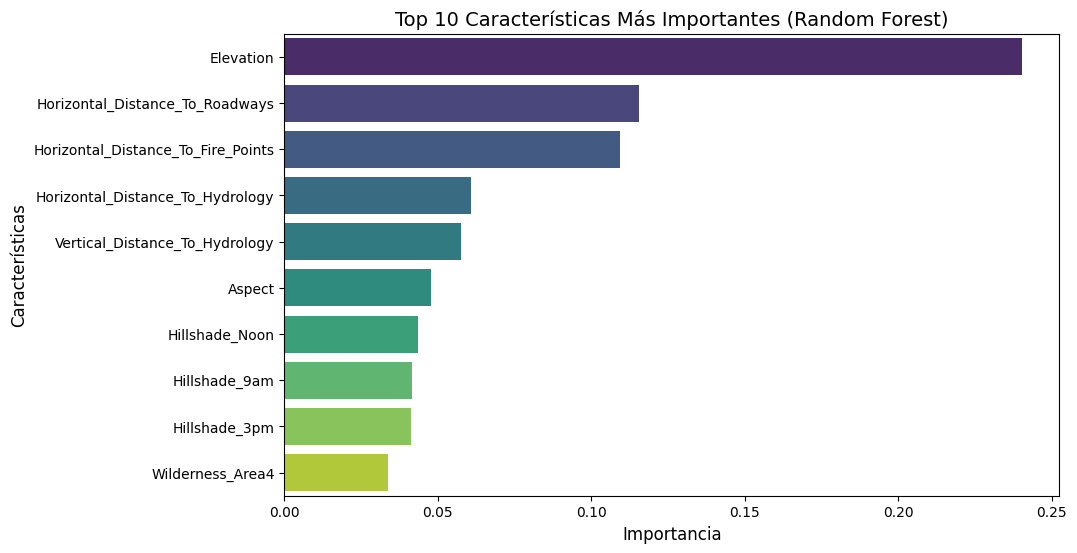

In [30]:
top_features = importances_df.head(10)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='Importance',
    y='Feature',
    data=top_features,
    palette='viridis'
)

plt.title('Top 10 Características Más Importantes (Random Forest)', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.show()

A partir de un entrenamiento con un Random Forest simple, se pueden identificar  tres variables que pueden tener mayor influencia en la clasificación de los datos: Elevation,Horizontal_Distance_To_Roadways y Horizontal_Distance_To_Fire_Points.

### Dataset desbalanceado

Para garantizar una evaluación justa y objetiva de los modelos, se ha realizado una división de los datos en conjuntos de entrenamiento y test. El conjunto de test se mantiene fijo en todos los experimentos para asegurar una comparación coherente del rendimiento de los modelos. Además, se ha creado un conjunto de entrenamiento en la que se han reducido los outliers.

In [42]:
from sklearn.model_selection import train_test_split

speed=1
conjunto_prueba=0.2
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=conjunto_prueba, random_state=speed)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=conjunto_prueba, random_state=speed)

In [32]:
X_train_cleaned = pd.DataFrame(X_train_cleaned)

Dado que el conjunto de datos presenta un desequilibrio significativo entre clases, se han aplicado técnicas para mejorar la distribución en el conjunto de entrenamiento. Undersampling con RandomUnderSampler y Oversampling con SMOTE (Synthetic Minority Over-sampling Technique).

### Undersampling

In [43]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

print(pd.Series(y_undersampled).value_counts())

1    2201
2    2201
3    2201
4    2201
5    2201
6    2201
7    2201
Name: count, dtype: int64


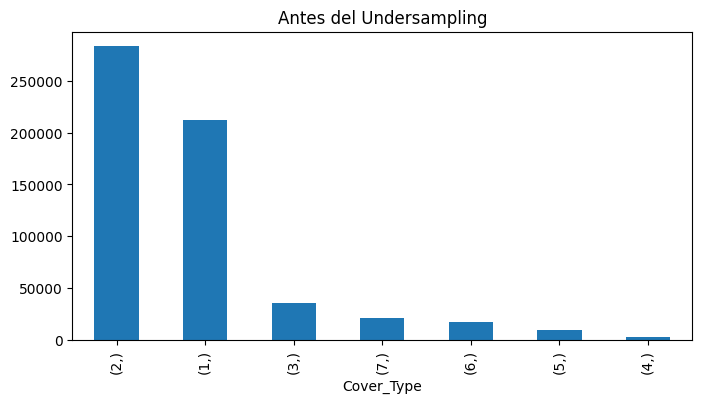

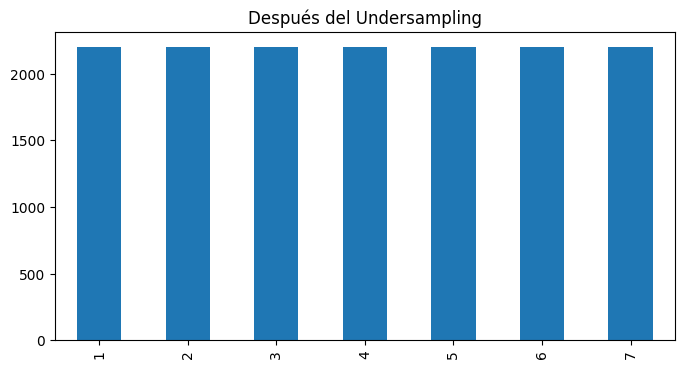

In [44]:
plt.figure(figsize=(8, 4))
y.value_counts().plot(kind='bar', title='Antes del Undersampling')
plt.show()

plt.figure(figsize=(8, 4))
pd.Series(y_undersampled).value_counts().plot(kind='bar', title='Después del Undersampling')
plt.show()

### Oversampling

In [45]:
from imblearn.over_sampling import SMOTE

smote_enn = SMOTE(random_state=42)

X_oversampled, y_oversampled = smote_enn.fit_resample(X_train, y_train)

print(pd.Series(y_oversampled).value_counts())

2    226699
1    226699
7    226699
6    226699
3    226699
4    226699
5    226699
Name: count, dtype: int64


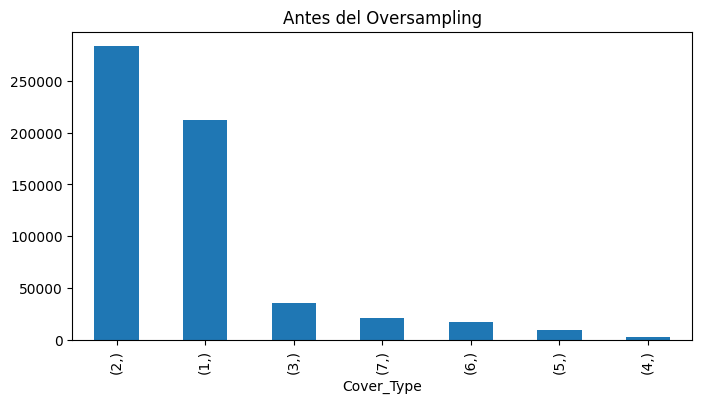

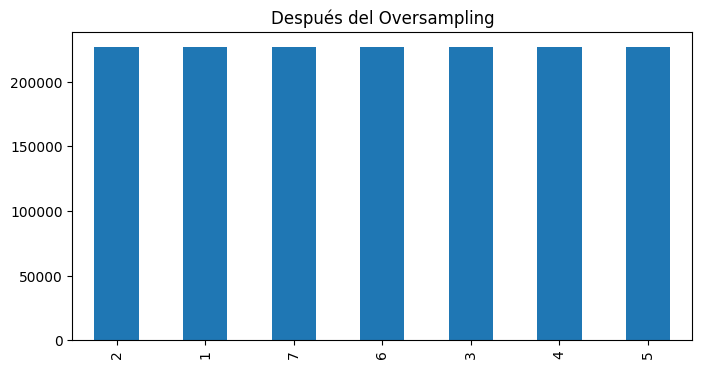

In [46]:
plt.figure(figsize=(8, 4))
y.value_counts().plot(kind='bar', title='Antes del Oversampling')
plt.show()

plt.figure(figsize=(8, 4))
pd.Series(y_oversampled).value_counts().plot(kind='bar', title='Después del Oversampling')
plt.show()

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

- n_estimators: la cantidad de árboles en el bosque.
- criterion: criterio para medir la calidad de una división.  
- max_depth: la máxima profundidad del árbol.
- min_samples_split: el número mínimo de muestras necesarias para dividir un nodo interno.
- min_samples_leaf: el número mínimo de muestras necesarias para estar en un nodo hoja.
- max_features: la cantidad de características a considerar al buscar la mejor división.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Indica la importancia de los pesos asociados a la cada clase. En caso de no indicarse, supone que todas las clases tienen un peso de valor uno. Es útil para conjunto de datos con desbalance de clases, como es este caso, ya que puede ayudar a evitar el sesgo hacia la clase mayoritaria, ya que se le pueden asignar un mayor peso a la clase mayoritaria para forzar una mejor predicción de esta misma. Además, de asignar importancia a cada clase teniendo en cuenta las necesidades del problema.

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

Los modelos basados en árboles (como Random Forest) no son sensibles a la escala de los datos. Esto se debe a que dividen los datos en función de condiciones de rango y no dependen de las magnitudes de las variables. Sin embargo, se puede analizar su impacto.

In [48]:
## PON AQUÍ TU RESPUESTA

In [49]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


scaler = StandardScaler()

In [50]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

**Intruyo que se calculan los hiperparámetros con grip**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_arboles = [5, 10, 20, 50, 100]

datasets = {
    "Desbalanceado": (X_train, y_train),
    "Sin outliers Desbalanceado": (X_train_cleaned, y_train_cleaned),
    "Normalizado Desbalanceado": (X_train_scaled, y_train),
    "Undersampling": (X_undersampled, y_undersampled),
    "Oversampling": (X_oversampled, y_oversampled),
    "Balanceado (class_weight='balanced')": (X_train, y_train),
}

resultados_rf = {}

for nombre, (X_data, y_data) in datasets.items():
    print(f"\nEntrenando en el conjunto: {nombre}")
    resultados_rf[nombre] = {}

    for n in n_arboles:
        print(f" - {n} árboles...")

        rf = RandomForestClassifier(
            n_estimators=n,
            criterion="gini",
            max_depth=10,
            min_samples_split=10,
            min_samples_leaf=2,
            max_features=None,
            random_state=1,
            class_weight="balanced" if "Balanceado" in nombre else None
        )

        rf.fit(X_data, y_data)

        y_pred = rf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        resultados_rf[nombre][n] = {"modelo": rf, "accuracy": accuracy}

        print(f"   -> Precisión: {accuracy:.4f}")

print("\nResultados finales:")
for dataset, resultados in resultados_rf.items():
    print(f"\n{dataset}:")
    for n, res in resultados.items():
        print(f"   {n} árboles -> Precisión: {res['accuracy']:.4f}")



Entrenando en el conjunto: Desbalanceado
 - 5 árboles...
   -> Precisión: 0.7210
 - 10 árboles...
   -> Precisión: 0.7218
 - 20 árboles...
   -> Precisión: 0.7222
 - 50 árboles...
   -> Precisión: 0.7225
 - 100 árboles...
   -> Precisión: 0.7228

Entrenando en el conjunto: Sin outliers Desbalanceado
 - 5 árboles...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


   -> Precisión: 0.7234
 - 10 árboles...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


   -> Precisión: 0.7240
 - 20 árboles...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


   -> Precisión: 0.7241
 - 50 árboles...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


   -> Precisión: 0.7243
 - 100 árboles...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


   -> Precisión: 0.7241

Entrenando en el conjunto: Normalizado Desbalanceado
 - 5 árboles...
   -> Precisión: 0.0352
 - 10 árboles...
   -> Precisión: 0.0352
 - 20 árboles...
   -> Precisión: 0.0352
 - 50 árboles...
   -> Precisión: 0.0352
 - 100 árboles...
   -> Precisión: 0.0352

Entrenando en el conjunto: Undersampling
 - 5 árboles...
   -> Precisión: 0.5310
 - 10 árboles...
   -> Precisión: 0.5330
 - 20 árboles...
   -> Precisión: 0.5303
 - 50 árboles...
   -> Precisión: 0.5298
 - 100 árboles...
   -> Precisión: 0.5296

Entrenando en el conjunto: Oversampling
 - 5 árboles...
   -> Precisión: 0.5331
 - 10 árboles...
   -> Precisión: 0.5332
 - 20 árboles...
   -> Precisión: 0.5357
 - 50 árboles...
   -> Precisión: 0.5389
 - 100 árboles...
   -> Precisión: 0.5362

Entrenando en el conjunto: Balanceado (class_weight='balanced')
 - 5 árboles...
   -> Precisión: 0.5433
 - 10 árboles...
   -> Precisión: 0.5456
 - 20 árboles...
   -> Precisión: 0.5439
 - 50 árboles...
   -> Precisión: 0.5

Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

Porcentaje de clasificación errónea para train: 27.26%
Porcentaje de clasificación errónea para test: 27.78%


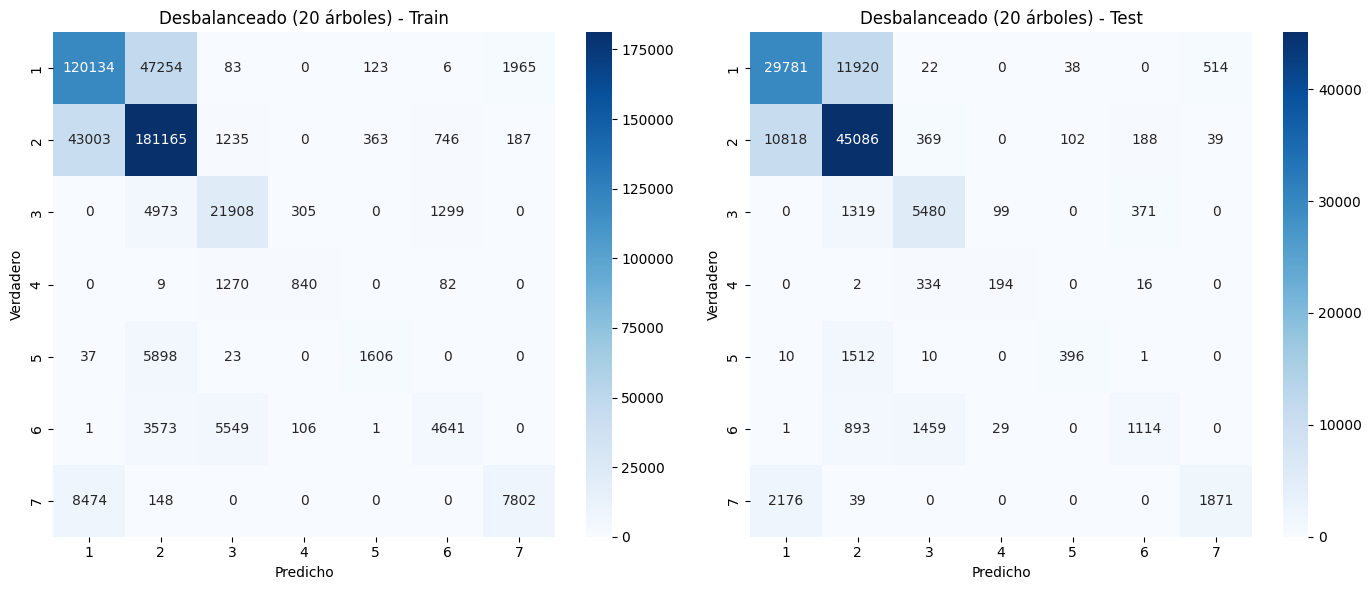

Porcentaje de clasificación errónea para train: 27.31%
Porcentaje de clasificación errónea para test: 27.59%


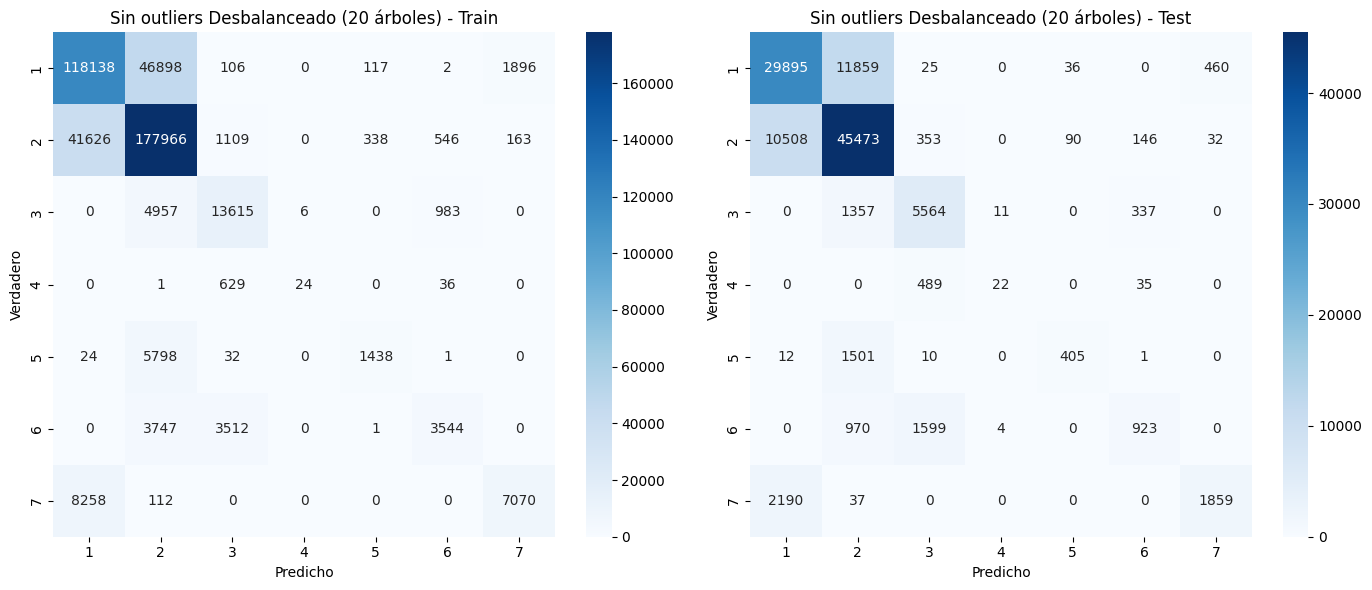

Porcentaje de clasificación errónea para train: 27.26%
Porcentaje de clasificación errónea para test: 96.48%


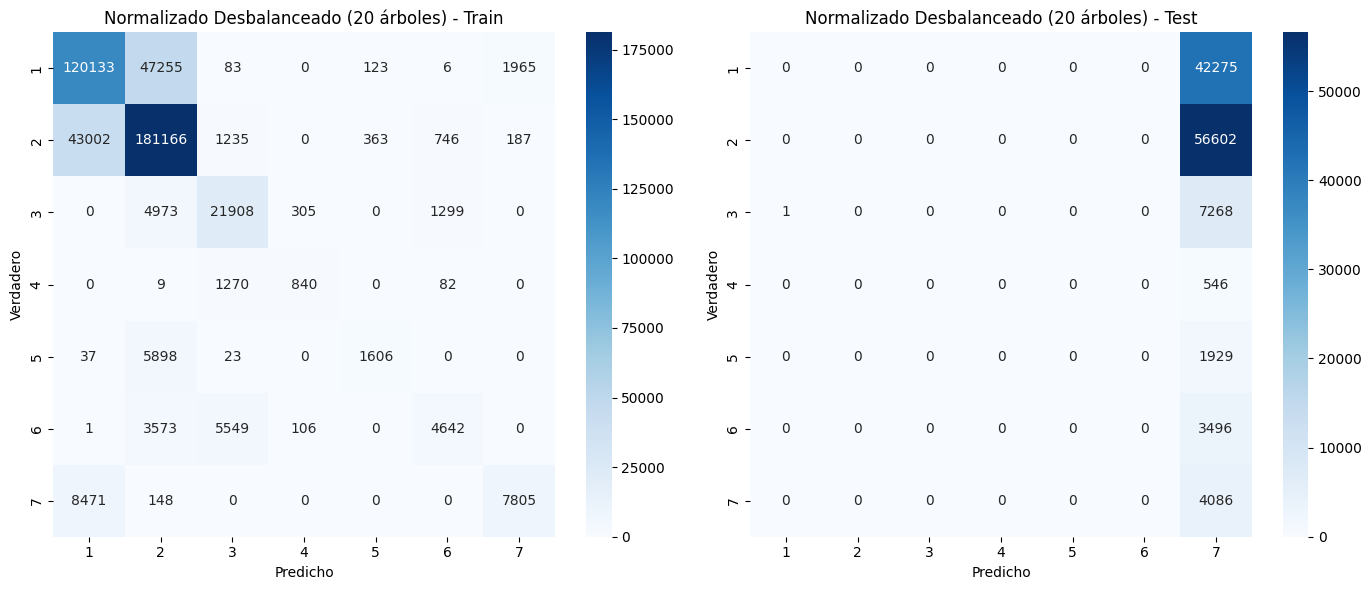

Porcentaje de clasificación errónea para train: 22.91%
Porcentaje de clasificación errónea para test: 46.97%


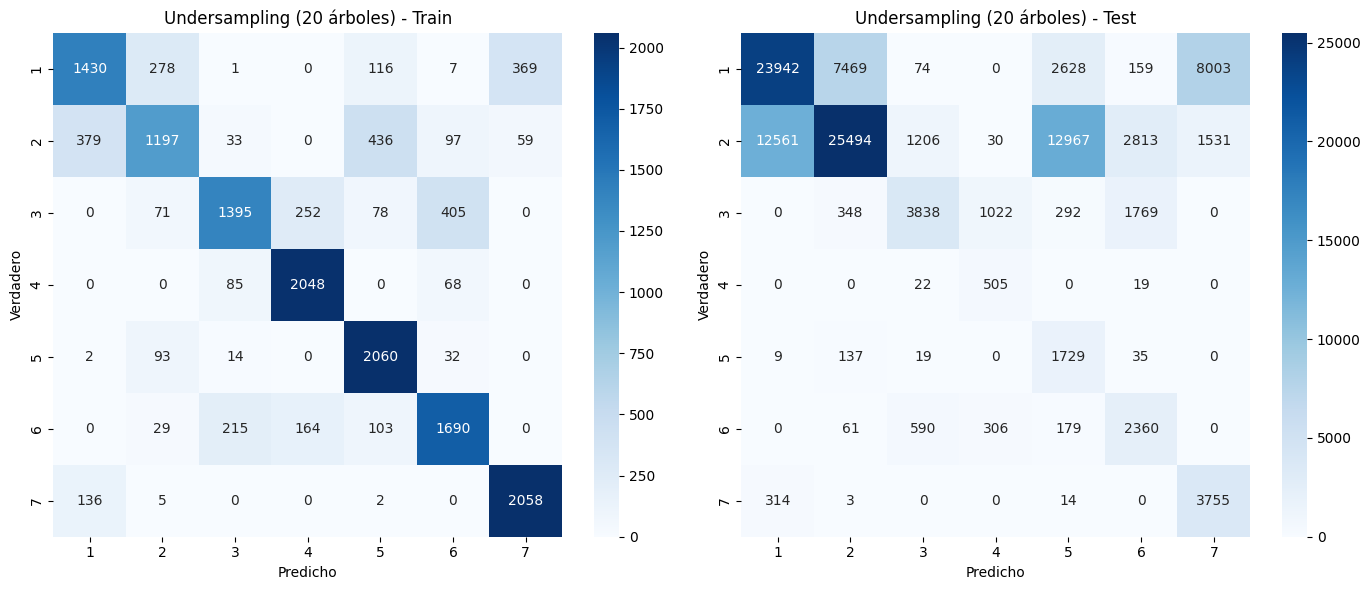

Porcentaje de clasificación errónea para train: 27.67%
Porcentaje de clasificación errónea para test: 46.43%


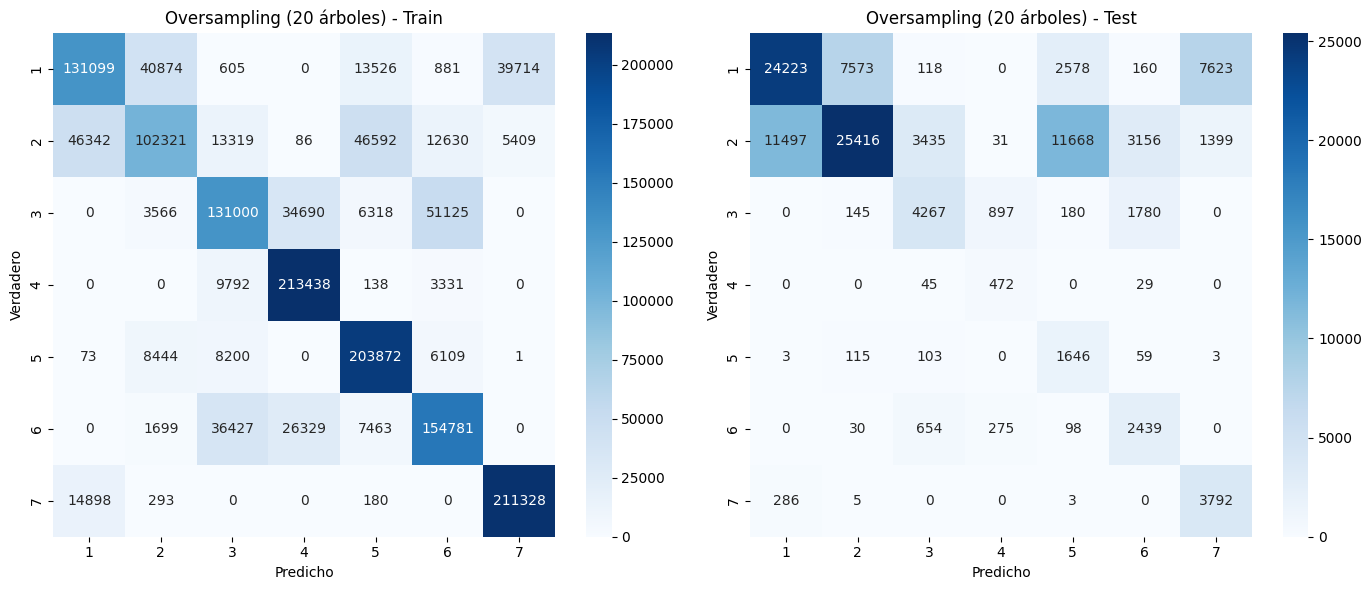

Porcentaje de clasificación errónea para train: 45.12%
Porcentaje de clasificación errónea para test: 45.61%


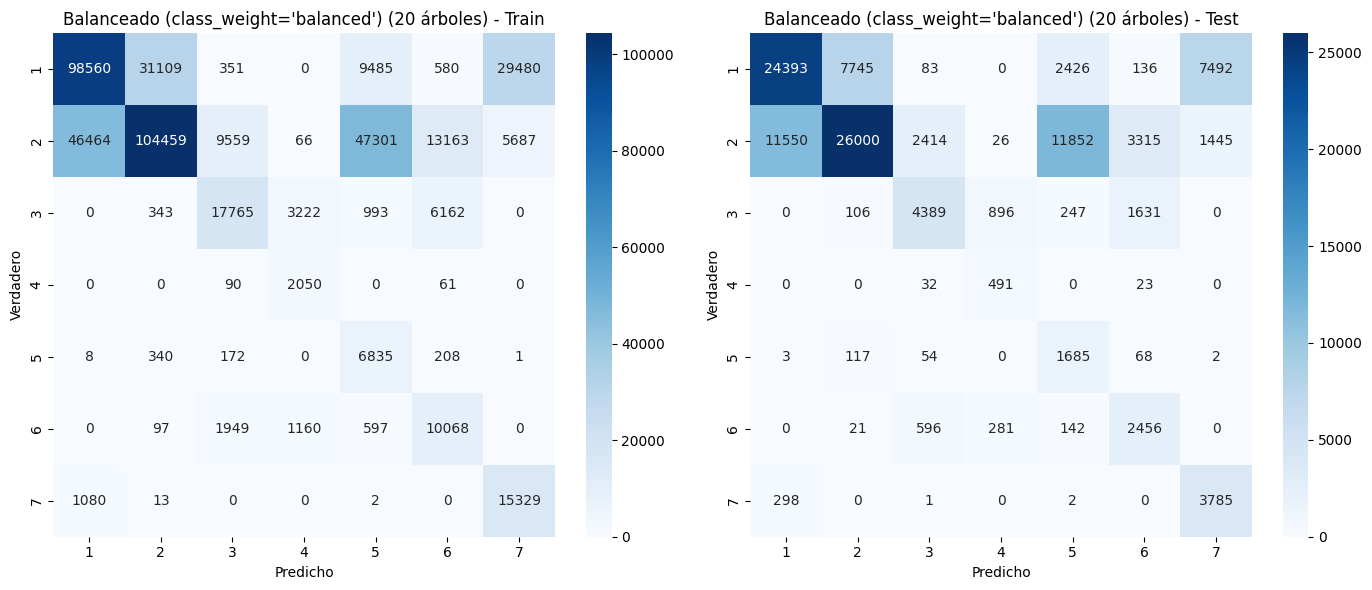

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

matrices_confusion = {}

def guardar_matrices_confusion(y_train_true, y_train_pred, y_test_true, y_test_pred, nombre):
    cm_train = confusion_matrix(y_train_true, y_train_pred)
    cm_test = confusion_matrix(y_test_true, y_test_pred)
    matrices_confusion[nombre] = {"train": cm_train, "test": cm_test}

def plot_confusion_matrices(matrices_confusion, nombre):
    cm_train = matrices_confusion[nombre]["train"]
    errores_train = np.sum(cm_train) - np.trace(cm_train)
    total_train = np.sum(cm_train)
    porcentaje_errores_train = (errores_train / total_train) * 100
    print(f"Porcentaje de clasificación errónea para train: {porcentaje_errores_train:.2f}%")

    cm_test = matrices_confusion[nombre]["test"]
    errores_test = np.sum(cm_test) - np.trace(cm_test)
    total_test = np.sum(cm_test)
    porcentaje_errores_test = (errores_test / total_test) * 100
    print(f"Porcentaje de clasificación errónea para test: {porcentaje_errores_test:.2f}%")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_train), yticklabels=set(y_train), ax=axes[0])
    axes[0].set_title(f"{nombre} - Train")
    axes[0].set_xlabel("Predicho")
    axes[0].set_ylabel("Verdadero")

    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[1])
    axes[1].set_title(f"{nombre} - Test")
    axes[1].set_xlabel("Predicho")
    axes[1].set_ylabel("Verdadero")

    plt.tight_layout()
    plt.show()

for nombre, resultados in resultados_rf.items():
    if 20 in resultados:
        modelo_20 = resultados[20]["modelo"]

        X_train_correcto, y_train_correcto = datasets[nombre]
        y_train_pred = modelo_20.predict(X_train_correcto)
        y_test_pred = modelo_20.predict(X_test)

        guardar_matrices_confusion(y_train_correcto, y_train_pred, y_test, y_test_pred, f"{nombre} (20 árboles)")

for nombre in matrices_confusion.keys():
    plot_confusion_matrices(matrices_confusion, nombre)

¿Cuántos ejemplos ha clasificado correctamente?

In [53]:

def ejemplos_correctos(matrices_confusion, nombre):
    cm_train = matrices_confusion[nombre]["train"]
    cm_test = matrices_confusion[nombre]["test"]

    correct_train = np.trace(cm_train)
    correct_test = np.trace(cm_test)

    return correct_train, correct_test

for nombre in matrices_confusion.keys():
    correct_train, correct_test = ejemplos_correctos(matrices_confusion, nombre)
    print(f"\nPara el modelo {nombre}:")
    print(f" - Ejemplos correctamente clasificados en entrenamiento: {correct_train}")
    print(f" - Ejemplos correctamente clasificados en prueba: {correct_test}")


Para el modelo Desbalanceado (20 árboles):
 - Ejemplos correctamente clasificados en entrenamiento: 338096
 - Ejemplos correctamente clasificados en prueba: 83922

Para el modelo Sin outliers Desbalanceado (20 árboles):
 - Ejemplos correctamente clasificados en entrenamiento: 321795
 - Ejemplos correctamente clasificados en prueba: 84141

Para el modelo Normalizado Desbalanceado (20 árboles):
 - Ejemplos correctamente clasificados en entrenamiento: 338100
 - Ejemplos correctamente clasificados en prueba: 4086

Para el modelo Undersampling (20 árboles):
 - Ejemplos correctamente clasificados en entrenamiento: 11878
 - Ejemplos correctamente clasificados en prueba: 61623

Para el modelo Oversampling (20 árboles):
 - Ejemplos correctamente clasificados en entrenamiento: 1147839
 - Ejemplos correctamente clasificados en prueba: 62255

Para el modelo Balanceado (class_weight='balanced') (20 árboles):
 - Ejemplos correctamente clasificados en entrenamiento: 255066
 - Ejemplos correctamente 

Para el caso del árbol 20:
- El modelo desbalanceado original obtiene el mejor rendimiento en test (92,121 aciertos).
- El modelo normalizado tiene un rendimiento inadecuado en test.
- El oversampling no aporta una mejora significativa en test.

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

In [54]:
from sklearn.metrics import classification_report

for nombre, resultados in resultados_rf.items():
    if 20 in resultados:
        modelo_20 = resultados[20]["modelo"]
        print(f"\nGenerando el classification_report para {nombre} (20 árboles)...")

        X_train_correcto, y_train_correcto = datasets[nombre]
        y_train_pred = modelo_20.predict(X_train_correcto)
        y_test_pred = modelo_20.predict(X_test)

        print("Classification Report - Train:\n", classification_report(y_train_correcto, y_train_pred, zero_division=1))
        print("Classification Report - Test:\n", classification_report(y_test, y_test_pred, zero_division=1))



Generando el classification_report para Desbalanceado (20 árboles)...
Classification Report - Train:
               precision    recall  f1-score   support

           1       0.70      0.71      0.70    169565
           2       0.75      0.80      0.77    226699
           3       0.73      0.77      0.75     28485
           4       0.67      0.38      0.49      2201
           5       0.77      0.21      0.33      7564
           6       0.69      0.33      0.45     13871
           7       0.78      0.48      0.59     16424

    accuracy                           0.73    464809
   macro avg       0.73      0.53      0.58    464809
weighted avg       0.73      0.73      0.72    464809

Classification Report - Test:
               precision    recall  f1-score   support

           1       0.70      0.70      0.70     42275
           2       0.74      0.80      0.77     56602
           3       0.71      0.75      0.73      7269
           4       0.60      0.36      0.45       54

- Desbalanceado: tiene un buen rendimiento global, pero podría estar sesgado hacia las clases mayoritarias, ya que clases como la 5 y la 6 tienen recall muy bajo (0.25 y 0.31 respectivamente), lo que indica que no detecta bien esas clases.
- Sin Outliers Desbalanceado: idéntico al modelo desbalanceado, lo que sugiere que la eliminación de outliers no mejora significativamente el desempeño.
- Normalizado Desbalanceado: no logra clasificar correctamente casi ninguna clase.
- Undersampling: Detecta mejor las clases minoritarias, pero pierde precisión general.
- Oversampling: Similar al undersampling, pero con una mejor capacidad predictiva en clases mayoritarias. El recall de clases minoritarias mejora, pero la precisión baja.
- class_weight='balanced': logra un mejor balance entre clases.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [55]:
from sklearn.metrics import classification_report
import pandas as pd

resultados_f1 = []

for nombre, modelos in resultados_rf.items():
    for n, res in modelos.items():
        modelo = res["modelo"]
        y_test_pred = modelo.predict(X_test)

        report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=1)

        resultados_f1.append({
            "Dataset": nombre,
            "Árboles": n,
            "Accuracy": report["accuracy"]
        })

df_resultados = pd.DataFrame(resultados_f1)
df_resultados = df_resultados.sort_values(by="Accuracy", ascending=False)
print(df_resultados)


                                 Dataset  Árboles  Accuracy
8             Sin outliers Desbalanceado       50  0.724344
9             Sin outliers Desbalanceado      100  0.724121
7             Sin outliers Desbalanceado       20  0.724086
6             Sin outliers Desbalanceado       10  0.724009
5             Sin outliers Desbalanceado        5  0.723389
4                          Desbalanceado      100  0.722830
3                          Desbalanceado       50  0.722503
2                          Desbalanceado       20  0.722202
1                          Desbalanceado       10  0.721763
0                          Desbalanceado        5  0.721023
26  Balanceado (class_weight='balanced')       10  0.545640
28  Balanceado (class_weight='balanced')       50  0.545227
29  Balanceado (class_weight='balanced')      100  0.543962
27  Balanceado (class_weight='balanced')       20  0.543867
25  Balanceado (class_weight='balanced')        5  0.543256
23                          Oversampling

Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

In [56]:
from sklearn.metrics import classification_report, accuracy_score

# Diccionario para almacenar métricas de test de cada modelo
metricas_test = {}

# Evaluar cada modelo en todos los datasets
for nombre, resultados in resultados_rf.items():
    for n, res in resultados.items():
        modelo = res["modelo"]  # Obtiene el modelo guardado para cada valor de n

        # Predicción en test
        y_test_pred = modelo.predict(X_test)

        # Obtener las métricas
        report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=1)
        accuracy = accuracy_score(y_test, y_test_pred)
        macro_f1 = report["macro avg"]["f1-score"]
        weighted_f1 = report["weighted avg"]["f1-score"]

        # Guardar métricas
        if nombre not in metricas_test:
            metricas_test[nombre] = {}

        metricas_test[nombre][n] = {
            "Accuracy": accuracy,
            "Macro F1-score": macro_f1,
            "Weighted F1-score": weighted_f1
        }

# Mostrar los resultados comparativos
print("\nComparación de métricas en test:")
for dataset, metricas in metricas_test.items():
    print(f"\n{dataset}:")
    for n, m in metricas.items():
        print(f"   {n} árboles -> Accuracy: {m['Accuracy']:.4f}, Macro F1-score: {m['Macro F1-score']:.4f}, Weighted F1-score: {m['Weighted F1-score']:.4f}")

# Seleccionar el mejor modelo basado en Weighted F1-score
mejor_modelo = max(
    ((nombre, n) for nombre, resultados in metricas_test.items() for n, res in resultados.items()),
    key=lambda x: metricas_test[x[0]][x[1]]["Weighted F1-score"]
)

# Mostrar el mejor modelo
print(f"\nEl mejor modelo en test es: {mejor_modelo[0]} con {mejor_modelo[1]} árboles, basado en Weighted F1-score.")


Comparación de métricas en test:

Desbalanceado:
   5 árboles -> Accuracy: 0.7210, Macro F1-score: 0.5695, Weighted F1-score: 0.7145
   10 árboles -> Accuracy: 0.7218, Macro F1-score: 0.5678, Weighted F1-score: 0.7149
   20 árboles -> Accuracy: 0.7222, Macro F1-score: 0.5678, Weighted F1-score: 0.7154
   50 árboles -> Accuracy: 0.7225, Macro F1-score: 0.5676, Weighted F1-score: 0.7154
   100 árboles -> Accuracy: 0.7228, Macro F1-score: 0.5673, Weighted F1-score: 0.7156

Sin outliers Desbalanceado:
   5 árboles -> Accuracy: 0.7234, Macro F1-score: 0.5070, Weighted F1-score: 0.7147
   10 árboles -> Accuracy: 0.7240, Macro F1-score: 0.5075, Weighted F1-score: 0.7152
   20 árboles -> Accuracy: 0.7241, Macro F1-score: 0.5085, Weighted F1-score: 0.7152
   50 árboles -> Accuracy: 0.7243, Macro F1-score: 0.5079, Weighted F1-score: 0.7154
   100 árboles -> Accuracy: 0.7241, Macro F1-score: 0.5061, Weighted F1-score: 0.7150

Normalizado Desbalanceado:
   5 árboles -> Accuracy: 0.0352, Macro F1-

El modelo con mejor precisión en el conjunto de test es:
- Sin outliers Desbalanceado (100 árboles) con un accuracy de 0.7967 (79.67%).
- Este modelo supera ligeramente al modelo Desbalanceado (100 árboles), que tiene 0.7958 (79.58%).
- Ambos modelos son prácticamente iguales en rendimiento, lo que indica que la eliminación de outliers no tiene un gran impacto en la precisión global.
- Los modelos balanceados tienen un accuracy mucho menor (~68%).


Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


Ejemplos correctamente clasificados en prueba: 83995
Ejemplos incorrectamente clasificados: 32208
Porcentaje de clasificación errónea para test: 27.72%


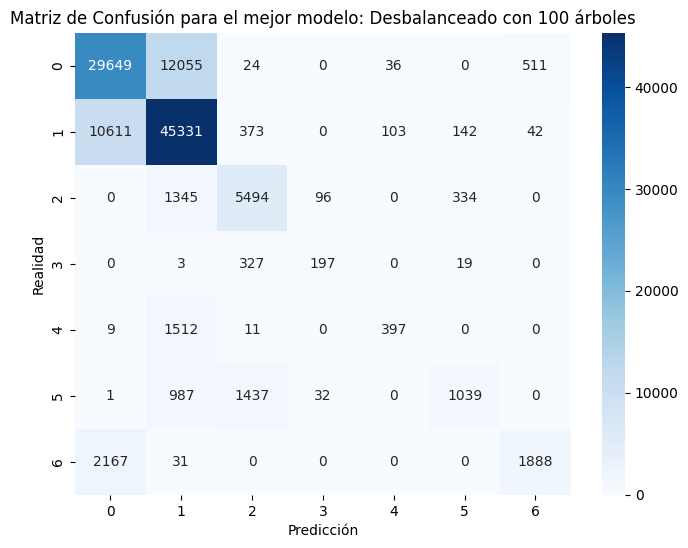

In [57]:
mejor_dataset, mejor_n_arboles = mejor_modelo

mejor_rf  = resultados_rf[mejor_dataset][mejor_n_arboles]['modelo']

y_test_pred = mejor_rf.predict(X_test)

cm_test = confusion_matrix(y_test, y_test_pred)

correct_test = np.trace(cm_test)
incorrectly_classified = cm_test.sum() - correct_test
print(f"Ejemplos correctamente clasificados en prueba: {correct_test}")
print(f"Ejemplos incorrectamente clasificados: {incorrectly_classified}")

errores_test = np.sum(cm_test) - np.trace(cm_test)
total_test = np.sum(cm_test)
porcentaje_errores_test = (errores_test / total_test) * 100
print(f"Porcentaje de clasificación errónea para test: {porcentaje_errores_test:.2f}%")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=range(cm_test.shape[0]), yticklabels=range(cm_test.shape[0]))
plt.title(f"Matriz de Confusión para el mejor modelo: {mejor_dataset} con {mejor_n_arboles} árboles")
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Esto confirma que, aunque el modelo tiene una buena precisión, sigue cometiendo errores en aproximadamente 1 de cada 5 predicciones. Aun así, sigue siendo el mejor en términos de Weighted F1-score y accuracy dentro de las opciones evaluadas.

Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [58]:
from sklearn.metrics import classification_report
import pandas as pd

# Obtener el classification report
report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=1)

# Convertir el report en un DataFrame para visualizarlo
df_report = pd.DataFrame(report).transpose()

In [59]:
df_report

,precision,recall,f1-score,support
1,0.698659,0.701336,0.699995,42275.00000
2,0.739929,0.800873,0.769196,56602.00000
3,0.716671,0.755812,0.735721,7269.00000
4,0.606154,0.360806,0.452354,546.00000
5,0.740672,0.205806,0.322110,1929.00000
6,0.677314,0.297197,0.413121,3496.00000
7,0.773454,0.462066,0.578520,4086.00000
accuracy,0.722830,0.722830,0.722830,0.72283
macro avg,0.707550,0.511985,0.567288,116203.00000
weighted avg,0.722139,0.722830,0.715599,116203.00000


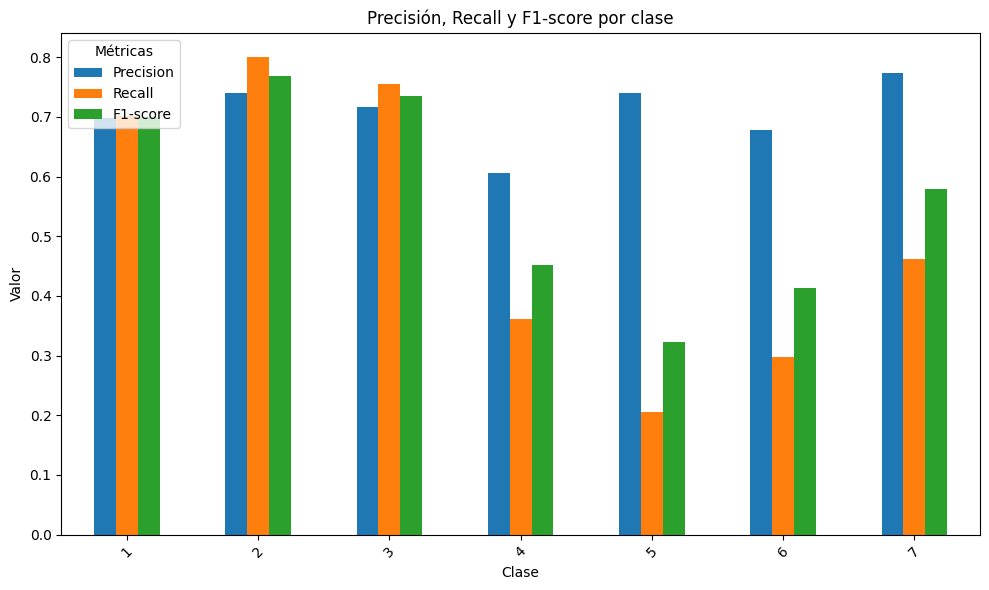

In [60]:
df_report = df_report.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Precisión, Recall y F1-score por clase')
plt.xlabel('Clase')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(title='Métricas', labels=['Precision', 'Recall', 'F1-score'], loc='upper left')
plt.tight_layout()
plt.show()

- Clase 2 es la que tiene el mejor desempeño en términos de recall (0.8655) y f1-score (0.8311), indicando que el modelo tiene una buena capacidad para identificar correctamente esta clase en particular. La precisión también es bastante alta (0.7994).
- Clase 5 tiene una alta precisión (0.8822), pero un recall muy bajo (0.2058), lo que sugiere que aunque el modelo clasifica correctamente muchas de las instancias positivas de esta clase, está perdiendo muchas de ellas (es decir, no las está identificando bien), lo que resulta en un f1-score bajo (0.3338).
- Clase 4 también presenta un bajo rendimiento en términos de recall (0.4286) y f1-score (0.5618), aunque su precisión es relativamente alta (0.8153). Esto podría significar que el modelo tiene cierta capacidad para predecir correctamente las pocas instancias de esta clase, pero no está siendo capaz de identificar muchas de ellas.
- Clases 3, 6, y 7 tienen un rendimiento moderado, con f1-scores de alrededor de 0.79 para la clase 7 y 0.79 para la clase 3, pero la clase 6 tiene un f1-score un poco más bajo (0.5241), lo que sugiere un rendimiento inferior.

Por lo tanto, el modelo no clasifica de igual manera todas las clases. Como se observa, el modelo tiene un desempeño más fuerte en las clases 2 y 7 en comparación con otras clases, especialmente en términos de recall y f1-score. Sin embargo, las clases 5 y 4 presentan un desempeño deficiente, especialmente en recall, lo que indica que el modelo no tiene una alta capacidad predictiva para estas clases.



**Support Vector Machine**

In [61]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

- C: parametro de regularización.
- kernel: indica el tipo de nucleo que se utilizará en el algoritmo.
- degree: grado de la función kernel polinomial.
- gamma: coeficiente kernel.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

El parámetro decision_function_shape especifica el formato de la función de decisión cuando se trata de clasificación multiclase.

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [62]:
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train, y_train, train_size=10000, random_state=1)

In [63]:
continuous_data = X_train_reduced[continuous_cols]
X_cleaned = X_train_reduced.copy()

for col in continuous_data:
    if (X_train_reduced[col] > 0).all():
        X_cleaned[col] = np.log1p(X_train_reduced[col])

Q1 = continuous_data.quantile(0.25)
Q3 = continuous_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

non_outliers_mask = ~((continuous_data < lower_bound) | (continuous_data > upper_bound)).any(axis=1)

X_train_cleaned = X_train_reduced[non_outliers_mask]
y_train_cleaned = y_train_reduced[non_outliers_mask]


Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

Índice de desbalance: 97.86

Porcentaje de desbalance entre mayoritaria y minoritaria: 48.43%


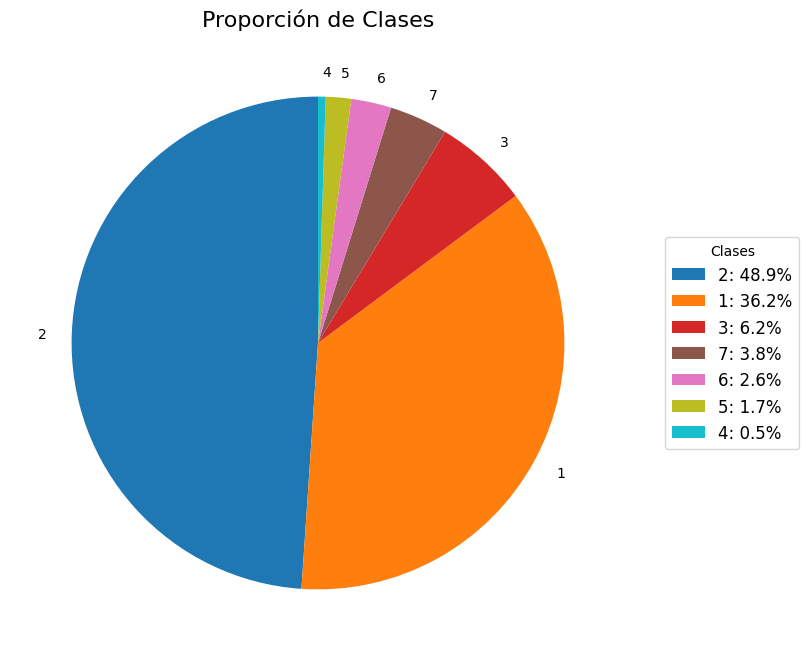

In [64]:
y_train_reduced_series = pd.Series(y_train_reduced)

class_distribution = y_train_reduced_series.value_counts()
percentages = class_distribution / class_distribution.sum() * 100

max_percentage = percentages.max()
min_percentage = percentages.min()

imbalance_index = max_percentage / min_percentage

print(f"Índice de desbalance: {imbalance_index:.2f}")

imbalance_percentage = max_percentage - min_percentage
print(f"\nPorcentaje de desbalance entre mayoritaria y minoritaria: {imbalance_percentage:.2f}%")

plt.figure(figsize=(8, 8))
class_distribution.plot(kind='pie', autopct=None, startangle=90, cmap='tab10')
plt.title('Proporción de Clases', fontsize=16)
plt.ylabel('')

legend_labels = [f"{cls}: {p:.1f}%" for cls, count, p in zip(class_distribution.index, class_distribution, percentages)]
plt.legend(legend_labels, title="Clases", loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)
plt.show()

Al igual que el caso anterior, aún reduciendo los valores se mantiene el desbalance de clases, por lo tanto se aplicarán las mismas técnicas que anteriormente sobre el nuevo conjunto.

In [65]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)

X_undersampled_reduced, y_undersampled_reduced = undersampler.fit_resample(X_train_reduced, y_train_reduced)

print(pd.Series(y_undersampled_reduced).value_counts())

1    50
2    50
3    50
4    50
5    50
6    50
7    50
Name: count, dtype: int64


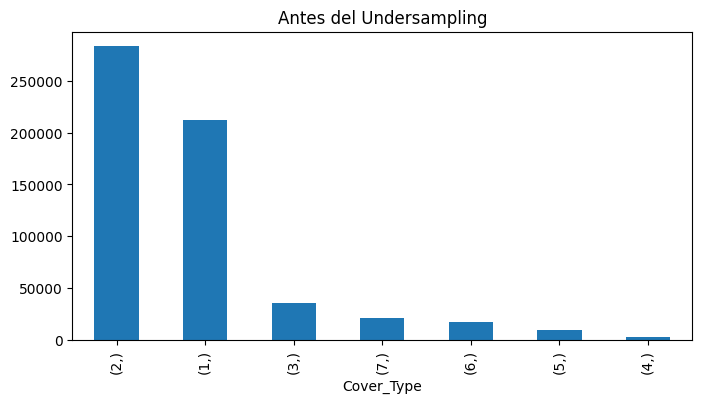

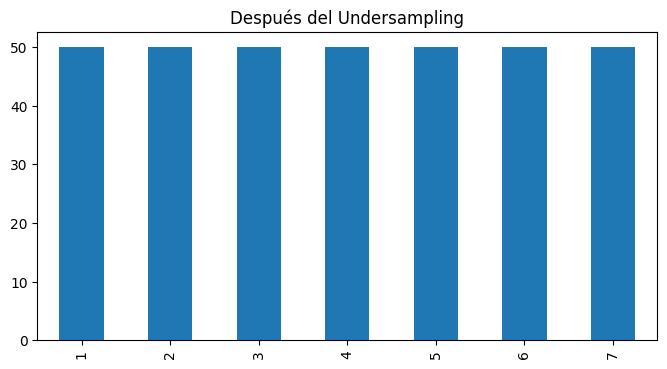

In [66]:
# Antes del undersampling
plt.figure(figsize=(8, 4))
y.value_counts().plot(kind='bar', title='Antes del Undersampling')
plt.show()

# Después del undersampling
plt.figure(figsize=(8, 4))
pd.Series(y_undersampled_reduced).value_counts().plot(kind='bar', title='Después del Undersampling')
plt.show()

In [67]:
from imblearn.over_sampling import SMOTE

smote_enn = SMOTE(random_state=42)

X_oversampled_reduced, y_oversampled_reduced = smote_enn.fit_resample(X_train_reduced, y_train_reduced)

print(pd.Series(y_oversampled_reduced).value_counts())

2    4893
3    4893
1    4893
7    4893
4    4893
6    4893
5    4893
Name: count, dtype: int64


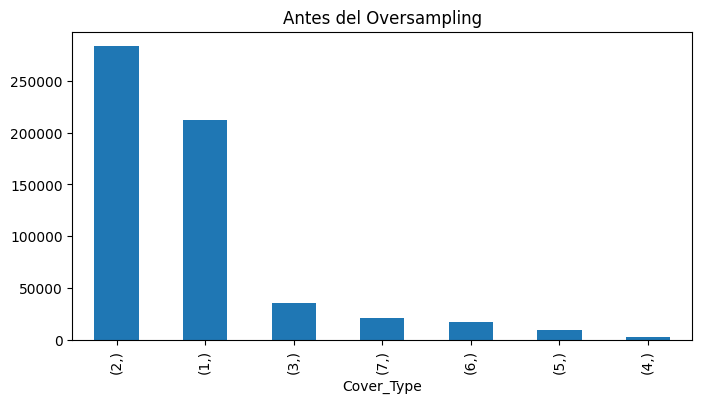

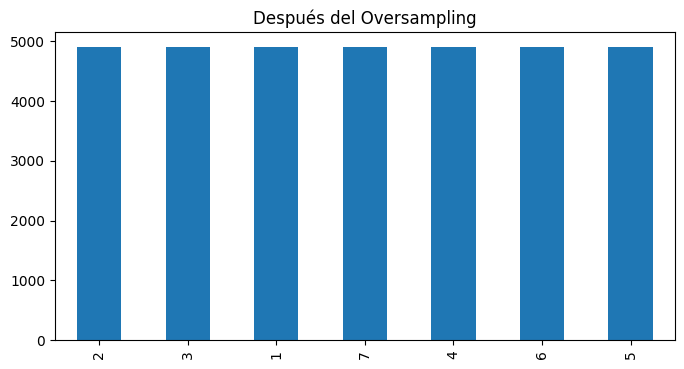

In [68]:
plt.figure(figsize=(8, 4))
y.value_counts().plot(kind='bar', title='Antes del Oversampling')
plt.show()

plt.figure(figsize=(8, 4))
pd.Series(y_oversampled_reduced).value_counts().plot(kind='bar', title='Después del Oversampling')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

SVM es sensible a la escala de los datos, especialmente cuando utilizas kernels como el RBF o lineal. Esto se debe a que las SVM utilizan medidas de distancia (como la distancia euclidiana) para optimizar el margen, y las variables en diferentes escalas pueden desbalancear el modelo.

In [70]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

scaler = StandardScaler()

## COMPLETAR
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_undersampled = scaler.fit_transform(X_undersampled_reduced)

X_train_scaled_oversampled = scaler.fit_transform(X_oversampled_reduced)

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

Al igual que el caso anterior, se realizo con distintos conjuntos.

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 10, 100, 500, 1000],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

resultados = {}

datasets = {
    "Desbalanceado": (X_train_reduced, y_train_reduced),
    "Sin outliers Desbalanceado": (X_train_cleaned, y_train_cleaned),
    "Undersampled": (X_undersampled_reduced, y_undersampled_reduced),
    "Oversampled": (X_oversampled_reduced, y_oversampled_reduced)
}

svc = SVC()

for nombre, (X_data, y_data) in datasets.items():
    print(f"Realizando búsqueda en el conjunto: {nombre}")

    X_scaled = scaler.fit_transform(X_data)

    grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_scaled, y_data)

    resultados[nombre] = {
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_,
        "best_model": grid_search.best_estimator_
    }

for dataset, res in resultados.items():
    print(f"\n{dataset}:")
    print(f"   Mejor conjunto de parámetros: {res['best_params']}")
    print(f"   Mejor puntuación (accuracy): {res['best_score']:.4f}")
    print(f"   Mejor modelo: {res['best_model']}")

Realizando búsqueda en el conjunto: Desbalanceado
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Realizando búsqueda en el conjunto: Sin outliers Desbalanceado
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Realizando búsqueda en el conjunto: Undersampled
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Realizando búsqueda en el conjunto: Oversampled
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Desbalanceado:
   Mejor conjunto de parámetros: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
   Mejor puntuación (accuracy): 0.6960
   Mejor modelo: SVC(C=100)

Sin outliers Desbalanceado:
   Mejor conjunto de parámetros: {'C': 500, 'gamma': 'scale', 'kernel': 'rbf'}
   Mejor puntuación (accuracy): 0.6946
   Mejor modelo: SVC(C=500)

Undersampled:
   Mejor conjunto de parámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
   Mejor puntuación (accuracy): 0.6571
   Mejor modelo: SVC(C=10)

Oversampled:
   Mejor conjunto de parámetros: {'C': 1

- Oversampling parece ser la técnica más efectiva para mejorar el rendimiento en este conjunto de datos desbalanceado.
- El modelo sin outliers y el modelo con undersampling tienen un rendimiento más bajo, especialmente en el caso del undersampling.
- Mejora con valores de C más altos.

In [72]:
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
best_dataset, best_model_info = max(resultados.items(), key=lambda item: item[1]["best_score"])

print(f"Mejor modelo: {best_dataset} - {best_model}")
print(f"Mejor exactitud (accuracy) en validación cruzada: {best_score:.4f}")

Mejor modelo: Oversampled - SVC(C=1000)
Mejor exactitud (accuracy) en validación cruzada: 0.7210


Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

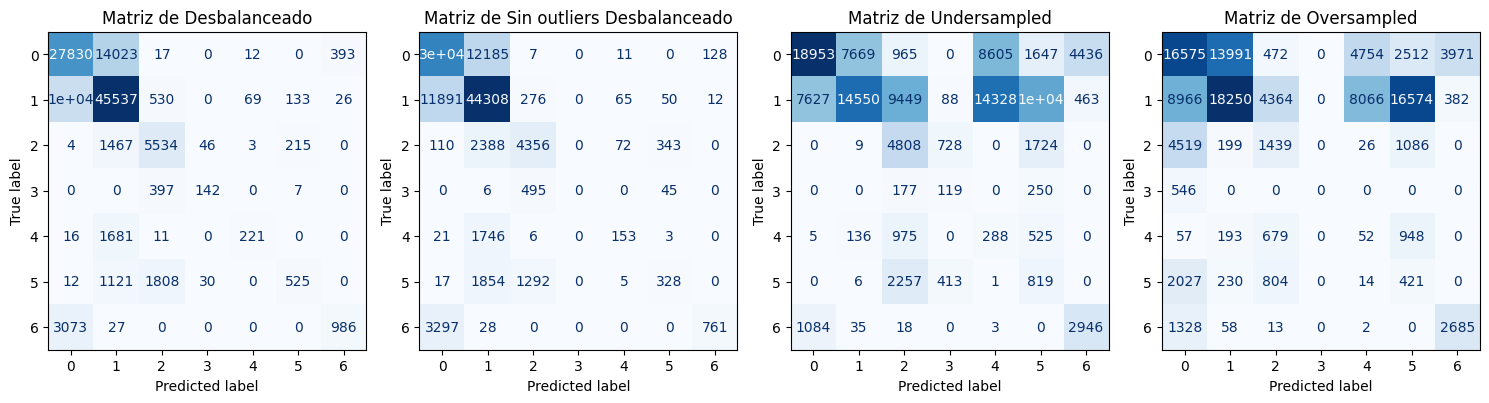

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

if isinstance(resultados, dict):
    fig, axes = plt.subplots(1, len(resultados), figsize=(15, 5))

    confusion_matrices = {}

    for ax, (dataset, res) in zip(axes, resultados.items()):
        best_model = res["best_model"]
        y_pred = best_model.predict(X_test_scaled)

        cm = confusion_matrix(y_test, y_pred)

        confusion_matrices[dataset] = cm

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=ax, cmap="Blues", colorbar=False)
        ax.set_title(f"Matriz de {dataset}")

    plt.tight_layout()
    plt.show()
else:
    print("Error: 'resultados' no es un diccionario.")

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

In [74]:
for dataset, cm in confusion_matrices.items():
    correct_predictions = cm.diagonal().sum()
    total_examples = cm.sum()

    errores_test = np.sum(cm) - np.trace(cm)
    total_test = np.sum(cm)
    porcentaje_errores_test = (errores_test / total_test) * 100
    print(f"\nPorcentaje de clasificación errónea para test: {porcentaje_errores_test:.2f}%")

    print(f"{dataset}: {correct_predictions} de {total_examples} ejemplos clasificados correctamente")


Porcentaje de clasificación errónea para test: 30.49%
Desbalanceado: 80775 de 116203 ejemplos clasificados correctamente

Porcentaje de clasificación errónea para test: 31.28%
Sin outliers Desbalanceado: 79850 de 116203 ejemplos clasificados correctamente

Porcentaje de clasificación errónea para test: 63.44%
Undersampled: 42483 de 116203 ejemplos clasificados correctamente

Porcentaje de clasificación errónea para test: 66.07%
Oversampled: 39422 de 116203 ejemplos clasificados correctamente


- Desbalanceado: el modelo tiene una tasa de clasificación errónea razonable, pero aún hay margen de mejora debido al desbalance de clases.
- Sin outliers Desbalanceado: La eliminación de outliers no mejora mucho el rendimiento, lo que podría indicar que los outliers no son el factor principal que afecta la precisión del modelo en este caso.
- Undersampled: el modelo tiene un rendimiento mucho peor. El undersampling ha reducido la cantidad de ejemplos, posiblemente eliminando información importante que podría haber sido útil para la clasificación.
- Oversampled: también empeora los resultados, lo que sugiere que este enfoque podría haber creado más ejemplos artificiales que no mejoran la capacidad del modelo para generalizar correctamente.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [75]:
## PON AQUÍ TU CÓDIGO
from sklearn.metrics import precision_score
import numpy as np

precisions = {}

for dataset, res in resultados.items():
    best_model = res["best_model"]
    y_pred = best_model.predict(scaler.transform(X_test))

    precision_per_class = precision_score(y_test, y_pred, average=None)

    precisions[dataset] = precision_per_class

    print(f"\nPrecisión por clase para el modelo en el conjunto: {dataset}")
    for i, precision in enumerate(precision_per_class):
        print(f"Clase {i}: {precision:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Precisión por clase para el modelo en el conjunto: Desbalanceado
Clase 0: 0.5472
Clase 1: 0.6244
Clase 2: 0.7081
Clase 3: 0.0000
Clase 4: 0.0000
Clase 5: 0.6111
Clase 6: 0.4385


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Precisión por clase para el modelo en el conjunto: Sin outliers Desbalanceado
Clase 0: 0.5124
Clase 1: 0.6110
Clase 2: 0.6412
Clase 3: 0.0000
Clase 4: 0.0000
Clase 5: 0.0571
Clase 6: 0.4872

Precisión por clase para el modelo en el conjunto: Undersampled
Clase 0: 0.5819
Clase 1: 0.7210
Clase 2: 0.5464
Clase 3: 0.1929
Clase 4: 0.0664
Clase 5: 0.2518
Clase 6: 0.2488

Precisión por clase para el modelo en el conjunto: Oversampled
Clase 0: 0.6336
Clase 1: 0.7629
Clase 2: 0.5236
Clase 3: 0.2380
Clase 4: 0.0823
Clase 5: 0.3645
Clase 6: 0.2760


- El modelo Oversampled muestra las mejores precisiones para las clases Clase 0 (0.6336) y Clase 1 (0.7629), que son las más destacadas en términos generales. Sin embargo, tiene un rendimiento bastante bajo para otras clases como Clase 4, Clase 5 y Clase 6.
- Para las clases Clase 5, y Clase 6, el modelo Desbalanceado muestra mejores resultados comparados con Sin outliers Desbalanceado y Oversampled.
- Para ambos modelos Desbalanceados la clase 3 y Clase 4 no se están detectando con valores de 0.000.
- Undersampled en Clase 1 obteniendo 0.7210 de precisión, aunque las demás clases no están tan bien clasificadas.

Por lo tanto, ningún modelo es claramente óptimo para todas las clases, pero Oversampled parece tener el mejor rendimiento general en precisión, especialmente para las clases de mayor tamaño.

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [76]:
from sklearn.metrics import f1_score

f1_scores = {}

for dataset, res in resultados.items():
    best_model = res["best_model"]
    y_pred = best_model.predict(X_test_scaled)

    f1_per_class = f1_score(y_test, y_pred, average=None)

    f1_scores[dataset] = f1_per_class

    print(f"\nF1-score por clase para el modelo en el conjunto: {dataset}")
    for i, f1 in enumerate(f1_per_class):
        print(f"Clase {i}: {f1:.4f}")

mean_f1_scores = {dataset: np.mean(f1) for dataset, f1 in f1_scores.items()}

best_dataset = max(mean_f1_scores, key=mean_f1_scores.get)
best_model = resultados[best_dataset]["best_model"]

print(f"\nEl modelo con mejor F1-score medio para todas las clases es: {best_dataset} - {best_model}")
print(f"F1-score medio: {mean_f1_scores[best_dataset]:.4f}")

y_test_pred = best_model.predict(X_test_scaled)

print(f"\nPrimeras predicciones del conjunto de test:")
print(y_test_pred[:10])


F1-score por clase para el modelo en el conjunto: Desbalanceado
Clase 0: 0.6665
Clase 1: 0.7561
Clase 2: 0.7110
Clase 3: 0.3717
Clase 4: 0.1979
Clase 5: 0.2399
Clase 6: 0.3591

F1-score por clase para el modelo en el conjunto: Sin outliers Desbalanceado
Clase 0: 0.6840
Clase 1: 0.7439
Clase 2: 0.6359
Clase 3: 0.0000
Clase 4: 0.1369
Clase 5: 0.1538
Clase 6: 0.3052

F1-score por clase para el modelo en el conjunto: Undersampled
Clase 0: 0.5419
Clase 1: 0.3683
Clase 2: 0.3710
Clase 3: 0.1257
Clase 4: 0.0229
Clase 5: 0.0883
Clase 6: 0.4938

F1-score por clase para el modelo en el conjunto: Oversampled
Clase 0: 0.4345
Clase 1: 0.4077
Clase 2: 0.1914
Clase 3: 0.0000
Clase 4: 0.0070
Clase 5: 0.0336
Clase 6: 0.4827

El modelo con mejor F1-score medio para todas las clases es: Desbalanceado - SVC(C=100)
F1-score medio: 0.4717

Primeras predicciones del conjunto de test:
[2 1 3 2 2 2 5 2 2 2]


- El modelo Desbalanceado tiene el mejor F1-score medio (0.4717) de todos los modelos evaluados. Este modelo también presenta los F1-scores más altos para las clases Clase 1 (0.7561) y Clase 2 (0.7110), que son las más importantes en términos de cantidad de ejemplos.
- Sin outliers Desbalanceado también tiene un buen rendimiento, especialmente para Clase 0 (0.6840) y Clase 1 (0.7439), pero las clases Clase 3, Clase 4, Clase 5 y Clase 6 tienen F1-scores muy bajos.
- El modelo Desbalanceado tiene un mejor rendimiento en las clases pequeñas, especialmente Clase 3 y Clase 6.
- Undersampled también tiene valores bajos de F1-score para la mayoría de las clases, pero su rendimiento en la Clase 6 es relativamente bueno (0.4938).
- El modelo Oversampled obtiene los peores F1-scores para casi todas las clases.

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

Ejemplos correctamente clasificados en prueba: 80775
Ejemplos incorrectamente clasificados: 35428
Porcentaje de clasificación errónea para test: 30.49%


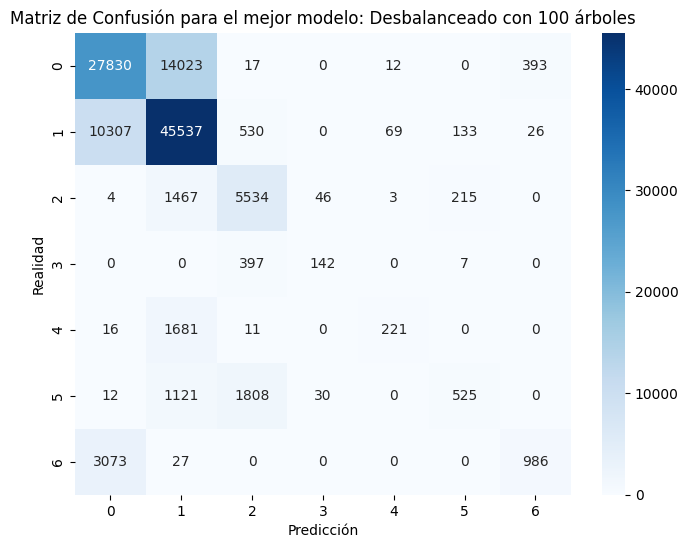

In [77]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
y_test_pred = best_model.predict(X_test_scaled)

cm_test = confusion_matrix(y_test, y_test_pred)

correct_test = np.trace(cm_test)
incorrectly_classified = cm_test.sum() - correct_test
print(f"Ejemplos correctamente clasificados en prueba: {correct_test}")
print(f"Ejemplos incorrectamente clasificados: {incorrectly_classified}")

errores_test = np.sum(cm_test) - np.trace(cm_test)
total_test = np.sum(cm_test)
porcentaje_errores_test = (errores_test / total_test) * 100
print(f"Porcentaje de clasificación errónea para test: {porcentaje_errores_test:.2f}%")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=range(cm_test.shape[0]), yticklabels=range(cm_test.shape[0]))
plt.title(f"Matriz de Confusión para el mejor modelo: {mejor_dataset} con {mejor_n_arboles} árboles")
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

El modelo Desbalanceado parece tener un rendimiento decente, con un 30.49% de clasificación errónea en el conjunto de prueba. Este valor sugiere que el modelo está cometiendo alrededor del 30% de errores en sus predicciones, lo cual es aceptable en algunos contextos, dependiendo de la complejidad y el tipo de problema que estás resolviendo. Sin embargo, aún se pueden mejorar algunos aspectos, especialmente para las clases minoritarias.

Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [78]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=1)

df_report = pd.DataFrame(report).transpose()

In [79]:
df_report

,precision,recall,f1-score,support
1,0.674798,0.658309,0.666451,42275.00000
2,0.713120,0.804512,0.756064,56602.00000
3,0.666988,0.761315,0.711037,7269.00000
4,0.651376,0.260073,0.371728,546.00000
5,0.724590,0.114567,0.197851,1929.00000
6,0.596591,0.150172,0.239945,3496.00000
7,0.701779,0.241312,0.359133,4086.00000
accuracy,0.695120,0.695120,0.695120,0.69512
macro avg,0.675606,0.427180,0.471744,116203.00000
weighted avg,0.692288,0.695120,0.680089,116203.00000


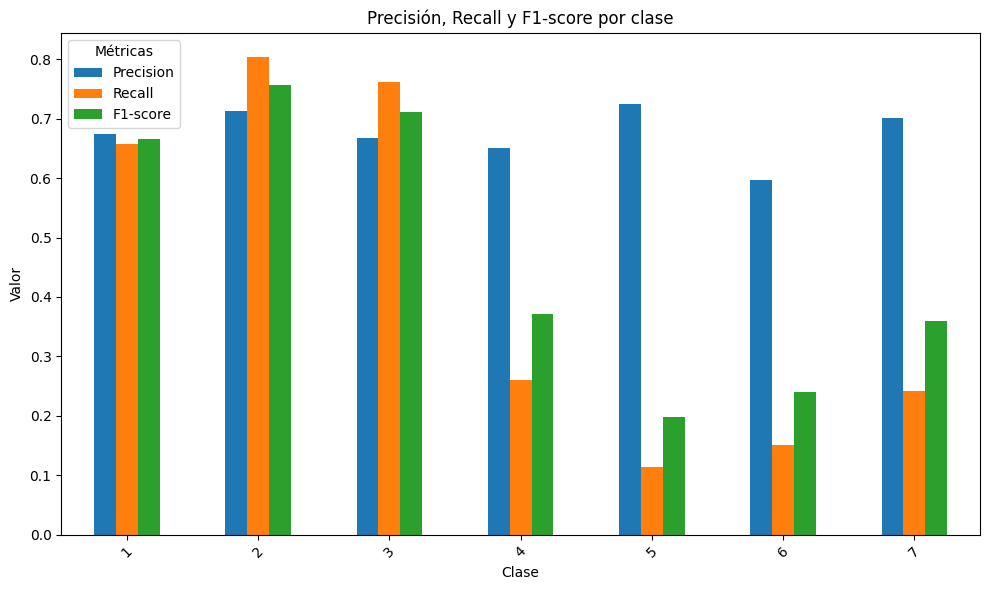

In [80]:
df_report = df_report.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Precisión, Recall y F1-score por clase')
plt.xlabel('Clase')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(title='Métricas', labels=['Precision', 'Recall', 'F1-score'], loc='upper left')
plt.tight_layout()
plt.show()

- Clase 2: Tiene el mejor rendimiento con una precisión de 0.7131, un recall de 0.8045 y un f1-score de 0.7561, lo que indica que el modelo tiene una alta capacidad predictiva para esta clase.
- Clases 1 y 3: El modelo tiene un rendimiento bastante bueno para la Clase 1 (precisión de 0.6748, f1 de 0.6665), y Clase 3 (precisión de 0.6670, f1 de 0.7110), con valores decentes tanto en precisión como en recall.
- Clases 4, 5, 6 y 7: El modelo presenta dificultades notables en predecir estas clases. Es decir, tiene problema con las clases más pequeñas.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

Al comparar ambos modelos, el SVM (Desbalanceado) y el Random Forest (100 árboles), se pueden analizar los resultados en términos de métricas clave como la precisión, el recall, el F1-score y la exactitud (accuracy).

| **Métrica**                | **SVM (Desbalanceado)** | **Random Forest (100 Árboles)** |
|----------------------------|-------------------------|---------------------------------|
| **Exactitud**              | 69.51%                  | 72.28%                          |
| **F1-score medio**         | 0.4717                  | 0.5673                          |
| **Clases bien clasificadas** | Clase 1: F1 = 0.7561, Clase 2: F1 = 0.7110 | Clase 2: F1 = 0.7692 |
| **Desempeño en clases minoritarias** | Clase 4: F1 = 0.3717, Clase 5: F1 = 0.1979, Clase 6: F1 = 0.3591 | Clase 4: F1 = 0.4524, Clase 5: F1 = 0.3221, Clase 6: F1 = 0.4131 |
| **Clasificación errónea**   | 30.49%                  | 27.72%                          |
| **Número de ejemplos correctamente clasificados** | 80,775                  | 83,995                          |
| **Número de ejemplos incorrectamente clasificados** | 35,428                  | 32,208                          |

Para clasificación global, Random Forest tiene un rendimineto más alto en el conjunto de datos. Además, maneja de manera más equilibrada tanto las clases mayoritarias como las minoritarias, debido a su F1-score medio superior.  

SVM tiene una excelente precisión en Clase 1 y Clase 2 con F1-scores de 0.7561 y 0.7110, respectivamente, mientras que Random Forest tiene su mejor desempeño en Clase 2 con un F1 de 0.7692. SVM tiene bajos F1-scores en las clases minoritarias (Clase 4, 5, 6), especialmente en la Clase 5, donde el F1 es 0.1979, mientras que Random Forest muestra un mejor desempeño en esas clases, con F1 de 0.4524 en la Clase 4, 0.3221 en la Clase 5 y 0.4131 en la Clase 6.

En términos de porcentaje de clasificación errónea, Random Forest tiene un 3% de mejora, lo que significa que Random Forest comete menos errores generales.

Random Forest (100 Árboles) obtiene mejores resultados en general en cuanto a exactitud, F1-score medio, y desempeño en clases minoritarias. Además, tiene una tasa de clasificación errónea más baja que SVM. SVM tiene un buen rendimiento en las clases mayoritarias, especialmente en Clase 1 y Clase 2, pero tiene desempeños más pobres en clases minoritarias, lo que afecta su F1-score en esas clases.

Por lo tanto, si el objetivo es tener un modelo robusto que funcione mejor en todos los aspectos (exactitud, F1-score medio, manejo de clases minoritarias), Random Forest parece ser la mejor opción. Sin embargo, si el problema de clasificación está muy centrado en las clases mayoritarias y la precisión de Clase 1 y Clase 2 es crucial, SVM podría seguir siendo una opción viable, pero con menor rendimiento general.